In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
# pip install -U textblob sklearn matplotlib seaborn chart-studio cufflinks bokeh
# conda install -c plotly chart-studio
# conda install -c conda-forge cufflinks-py 
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
# reinstall numpy, then 
# conda install -c conda-forge spacy
# python -m spacy validate
import spacy
from pprint import pprint
import en_core_web_sm
nlp = en_core_web_sm.load()

Loading BokehJS ...

In [4]:
df = pd.read_csv('Train_all_types.csv')
df.head()

,Complexity_level,text
0,L-Q,is moss a plant or a fungus\r\n[ - is that it ...
1,L-Q,It was fun to do with classmates and easy it d...
2,L-Q,Maybe there is something attracting the moss s...
3,L-Q,[are ant hills living or noliving-- ]\r\n
4,L-Q,Did you know that there is a Queen ant?


We want to do as much as I can with this data set that contains text feature.

In [5]:
#df.drop('Complexity_level', axis=1, inplace=True)

In [6]:
a = 0 
for i in range(a,a+4):
    print(df['Complexity_level'][i])
    print(df['text'][i])
    print()

L-Q
is moss a plant or a fungus
[ - is that it is a fungus- ] but I am unsure and will update you when I have done further research
Your friend Sienna (:

L-Q
It was fun to do with classmates and easy it didn't really make a big mess for us my questions are can we go longer and can it get harder cuz what we did was easy .

L-Q
Maybe there is something attracting the moss so it goes north?

L-Q
[are ant hills living or noliving-- ]




In [7]:
#df.drop('Complexity_level', axis=1, inplace=True)
df = df[~df['text'].isnull()]

In [8]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df['text'] = preprocess(df['text'])

New column for sentiment polarity. Two new columns for lengths of the review and word count.

In [9]:
df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['text_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [10]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity >= 0.90, ['text']].sample(5, replace=True).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Lasers are very bright and they can burn through anything in the world It can burn through steel and chrome and cloth and iron and metal and everything 
Lasers are very bright and they can burn through anything in the world It can burn through steel and chrome and cloth and iron and metal and everything 
Sophia you should try this brainpop on the dreams maybe it could help you find more evidence on you theory!!! Here is the websightfor the video,https://www.brainpop.com/science/ecologyandbehavior/dreams/ (Link->https://www.brainpop.com/science/ecologyandbehavior/dreams/)
Sophia you should try this brainpop on the dreams maybe it could help you find more evidence on you theory!!! Here is the websightfor the video,https://www.brainpop.com/science/ecologyandbehavior/dreams/ (Link->https://www.brainpop.com/science/ecologyandbehavior/dreams/)
Sophia you should try this brainpop on the dreams maybe it could help you find more e

In [11]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Are ornamental grasses found all over the world ? ??
I noticed that moss does not have seeds.
[ - that why does moss grow if it does not have seeds so it can grow.
[ - is moss is growing because a reaction that supposedly it makes moss grow.- ]
does weather do anything to the ecosyestems?
There is an ornamental grass called Feather Reed Grass
(Calamagrostis acutiflora) and it is from 3 to 5 feet tall and it has a lot of flowers.
Heres A Diagram Of A Leaf!
Image -> https://kf6.rit.albany.edu//attachments/5b87586745b8a02554df72de/5c055616c0c1561fdba7062f/1/Screenshot 2018-12-03 at 11.08.26 AM.png


In [12]:
df.polarity.min()

-0.75

In [13]:
df.loc[df.polarity <= -0.6]

,Complexity_level,text,polarity,text_len,word_count
96,L-Q,The reason why is that it is very expensive to...,-0.65,63,12
151,L-Q,"my wondering is ifbirds, bats, dragonflies, fr...",-0.75,332,55
644,L-I,The freezing and cold tempretures will kill th...,-0.60,85,16
915,L-I,ants used ant hills for bad weather they alos ...,-0.70,82,17
941,L-I,"[ - When it's cold, Ants sleep through the win...",-0.60,185,35


In [14]:
print('2 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -0.75, ['text']].sample(1).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

my wondering is ifbirds, bats, dragonflies, frogs, and spiderseat mosquitoes.will they get the disease? Ifthey get the dieaseses they would die and they will eventually will go inxtinctand there will no mosquito feeders then there will be alot of mosquitoes and they alot of people will get the diseases and alot mamals will die. :(


### Dist plot of review polarity score

In [15]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

Vast majority of the polarity are greater than 0, means most of them are positive.

### Reviewers age distribution

In [16]:
# df['Age'].iplot(
#     kind='hist',
#     bins=50,
#     xTitle='age',
#     linecolor='black',
#     yTitle='count',
#     title='Reviewers Age Distribution')

Most reviewers are in their 30s to 40s.

In [17]:
df['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [18]:
df['word_count'].iplot(
     kind='hist',
     bins=100,
     xTitle='word count',
     linecolor='black',
     yTitle='count',
     title='Review Text Word Count Distribution')

There were quite number of people like to leave long reviews.

In [19]:
df.groupby('Complexity_level').count()['text'].iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Bar chart of Complexity level', xTitle='Complexity level')

In [ ]:
## 2D Density Jointplot of Word Count and Sentiment Polarity

In [20]:
 trace1 = go.Scatter(
     x=df['word_count'], y=df['polarity'], mode='markers', name='points',
     marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
 )
 trace2 = go.Histogram2dContour(
     x=df['word_count'], y=df['polarity'], name='density', ncontours=20,
     colorscale='Hot', reversescale=True, showscale=False
 )
 trace3 = go.Histogram(
     x=df['word_count'], name='Word Count density',
     marker=dict(color='rgb(102,0,0)'),
     yaxis='y2'
 )
 trace4 = go.Histogram(
     y=df['polarity'], name='Polarity density', marker=dict(color='rgb(102,0,0)'),
     xaxis='x2'
 )
 data = [trace1, trace2, trace3, trace4]

 layout = go.Layout(
     showlegend=False,
     autosize=False,
     width=600,
     height=550,
     xaxis=dict(
         domain=[0, 0.85],
         showgrid=False,
         zeroline=False
     ),
     yaxis=dict(
         domain=[0, 0.85],
         showgrid=False,
         zeroline=False
     ),
     margin=dict(
         t=50
     ),
     hovermode='closest',
     bargap=0,
     xaxis2=dict(
         domain=[0.85, 1],
         showgrid=False,
         zeroline=False
     ),
     yaxis2=dict(
         domain=[0.85, 1],
         showgrid=False,
         zeroline=False
     )
 )

 fig = go.Figure(data=data, layout=layout)
 iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

People in their 30s are likely to give high ratings.

There were few people are very positive or very negative, people who give neutral to positive reviews are more likely to be in their 30s. Probably people at these age are likely to be active.

### Ratings between age groups

In [21]:
 df[['polarity', 'word_count']].iplot(secondary_y='word_count', secondary_y_title='Word Count',
     kind='box', yTitle='Sentiment Polarity', title='Box Plot of Word Count and Sentiment Polarity')

### 2D Density Jointplot of Sentiment Polarity vs. Complexity_level

In [22]:
trace1 = go.Scatter(
    x=df['polarity'], y=df['Complexity_level'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['polarity'], y=df['Complexity_level'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['Complexity_level'], name='Complexity level density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

### Distribution of sentiment polarity score by recommendations

In [25]:
x1 = df.loc[df['Complexity_level'] == 'L-I', 'polarity']
x2 = df.loc[df['Complexity_level'] == 'L-Q', 'polarity']
x3 = df.loc[df['Complexity_level'] == 'L-R', 'polarity']
x4 = df.loc[df['Complexity_level'] == 'L-IS', 'polarity']

trace1 = go.Histogram(
    x=x1, name='L-I',
    opacity=0.6
)
trace2 = go.Histogram(
    x=x2, name = 'L-Q',
    opacity=0.7
)
trace3 = go.Histogram(
    x=x3, name='L-R',
    opacity=0.75
)
trace4 = go.Histogram(
    x=x4, name = 'L-IS',
    opacity=0.9
)


data = [trace1, trace2,trace3, trace4]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity of reviews based on Complexity Level')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

### Top unigrams before removing stop words

In [26]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

the 2348
and 1260
is 1060
that 799
it 774
to 759
of 739
in 580
are 514
water 457
they 410
you 363
light 344
on 325
can 298
when 280
we 277
if 264
have 255
there 245


In [27]:
# df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

### Top unigrams after removing stop words

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

water 457
light 344
moss 198
https 197
theory 194
like 188
ants 188
need 183
com 140
ant 134
plants 132
make 130
link 124
grow 119
red 112
www 105
think 104
sun 104
food 103
green 102


In [29]:
# df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

### Top bigrams before removing stop words

In [31]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

in the 202
is that 197
my theory 161
of the 154
and the 123
theory is 113
on the 112
the sun 89
need to 89
that the 88
https www 86
link https 81
to the 79
there is 73
it is 72
to understand 70
is the 68
if you 67
there are 65
new information 64


In [33]:
df3.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

### Top bigrams after removing stop words

In [34]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

https www 86
link https 81
need understand 70
new information 64
google com 51
docs google 45
https docs 44
image https 39
ant hills 33
https kf6 31
kf6 rit 31
rit albany 31
albany edu 31
white light 29
edu attachments 28
attachments 5b87586745b8a02554df72de 28
com presentation 27
carbon dioxide 25
www brainpop 24
brainpop com 24


In [35]:
df4.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

### Top trigrams before removing stop words

In [36]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

my theory is 107
theory is that 80
need to understand 70
https docs google 44
docs google com 44
link https www 41
is that the 37
image https kf6 31
https kf6 rit 31
kf6 rit albany 31
rit albany edu 31
albany edu attachments 28
edu attachments 5b87586745b8a02554df72de 28
is when the 28
google com presentation 27
to understand how 26
https www brainpop 24
www brainpop com 24
link https docs 22
edit usp sharing 21


In [37]:
df5.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

### Top trigrams after removing stop words

In [38]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

https docs google 44
docs google com 44
link https www 41
image https kf6 31
https kf6 rit 31
kf6 rit albany 31
rit albany edu 31
albany edu attachments 28
edu attachments 5b87586745b8a02554df72de 28
google com presentation 27
https www brainpop 24
www brainpop com 24
link https docs 22
edit usp sharing 21
brainpop com health 16
www youtube com 14
youtube com watch 14
build ant hills 13
edit slide id 13
google com document 13


In [39]:
df6.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

### Top 20 part-of-speech tagging of review corpus

In [41]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

In [42]:
x1 = df.loc[df['Complexity_level'] == 'L-I', 'word_count']
x2 = df.loc[df['Complexity_level'] == 'L-Q', 'word_count']
x3 = df.loc[df['Complexity_level'] == 'L-R', 'word_count']
x4 = df.loc[df['Complexity_level'] == 'L-IS', 'word_count']

trace1 = go.Histogram(
    x=x1, name='L-I',
    opacity=0.6
)
trace2 = go.Histogram(
    x=x2, name = 'L-Q',
    opacity=0.7
)
trace3 = go.Histogram(
    x=x3, name='L-R',
    opacity=0.75
)
trace4 = go.Histogram(
    x=x4, name = 'L-IS',
    opacity=0.9
)


data = [trace1, trace2,trace3, trace4]
layout = go.Layout(barmode='overlay', title='Distribution of Word counts based on Complexity Level')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

In [43]:
y0 = df.loc[df['Complexity_level'] == 'L-I']['polarity']
y1 = df.loc[df['Complexity_level'] == 'L-IS']['polarity']
y2 = df.loc[df['Complexity_level'] == 'L-Q']['polarity']
y3 = df.loc[df['Complexity_level'] == 'L-R']['polarity']

trace0 = go.Box(
    y=y0,
    name = 'L-I',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'L-IS',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'L-Q',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'L-R',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Complexity Level"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Complexity Level")

In [44]:
y0 = df.loc[df['Complexity_level'] == 'L-I']['text_len']
y1 = df.loc[df['Complexity_level'] == 'L-IS']['text_len']
y2 = df.loc[df['Complexity_level'] == 'L-Q']['text_len']
y3 = df.loc[df['Complexity_level'] == 'L-R']['text_len']

trace0 = go.Box(
    y=y0,
    name = 'L-I',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'L-IS',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'L-Q',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'L-R',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Text Length Boxplot of Complexity Level"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Text Length Boxplot of Complexity Level")

In [45]:
y0 = df.loc[df['Complexity_level'] == 'L-I']['word_count']
y1 = df.loc[df['Complexity_level'] == 'L-IS']['word_count']
y2 = df.loc[df['Complexity_level'] == 'L-Q']['word_count']
y3 = df.loc[df['Complexity_level'] == 'L-R']['word_count']

trace0 = go.Box(
    y=y0,
    name = 'L-I',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'L-IS',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'L-Q',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'L-R',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Word Count Boxplot of Complexity Level"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Word Count Boxplot of Complexity Level")

### Topic Modeling with LSA

In [46]:
reindexed_data = df['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [47]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [48]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [49]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [50]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [51]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  water light theory
Topic 2:  red blue green
Topic 3:  ants ant hills
Topic 4:  sun moon shadow
Topic 5:  moss grow tree
Topic 6:  https com link


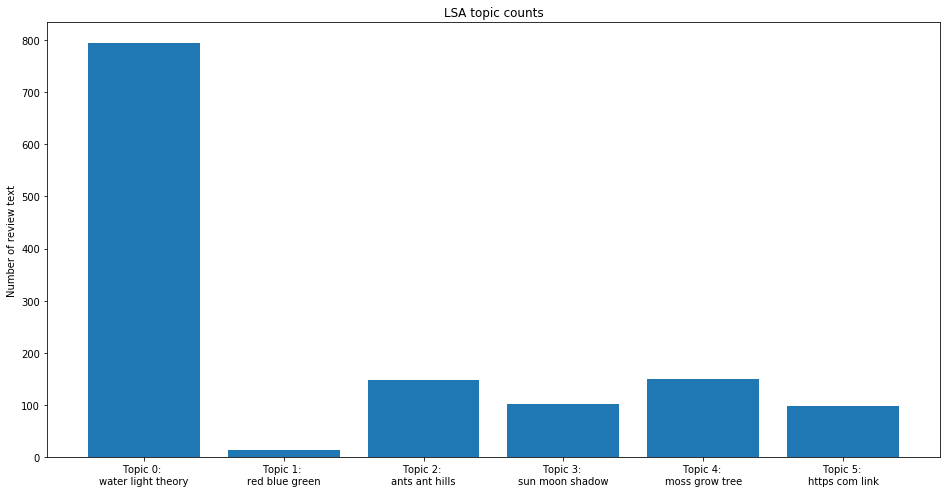

In [52]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

In [53]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1306 samples in 0.007s...
[t-SNE] Computed neighbors for 1306 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1306
[t-SNE] Computed conditional probabilities for sample 1306 / 1306
[t-SNE] Mean sigma: 0.028316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.888920
[t-SNE] KL divergence after 2000 iterations: 0.437166


In [54]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        reviews_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                reviews_in_that_topic.append(two_dim_vectors[i])    
        
        reviews_in_that_topic = np.vstack(reviews_in_that_topic)
        mean_review_in_that_topic = np.mean(reviews_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_review_in_that_topic)
    return mean_topic_vectors

In [55]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [56]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

GlyphRenderer(id='1039', ...)

Here are the terms that differentiate the review text from a general English corpus.

In [57]:
corpus = st.CorpusFromPandas(df, category_col='Complexity_level', text_col='text', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['decomposers', 'tardigrade', 'stinkbugs', 'chorophyll', 'brainpop', 'anthills', 'briophytes', 'nontransparent', 'virtualforest', 'catipillar']


Here are the terms in review text that are most associated with Tops complexity_level:

In [68]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Tops L-I Score'] = corpus.get_scaled_f_scores('L-I')
term_freq_df['Tops L-IS Score'] = corpus.get_scaled_f_scores('L-IS')
term_freq_df['Tops L-Q Score'] = corpus.get_scaled_f_scores('L-Q')
term_freq_df['Tops L-R Score'] = corpus.get_scaled_f_scores('L-R')
print('Tops L-I Score')
pprint(list(term_freq_df.sort_values(by='Tops L-I Score', ascending=False).index[:10]))
print()
print('Tops L-IS Score')
pprint(list(term_freq_df.sort_values(by='Tops L-IS Score', ascending=False).index[:10]))
print()
print('Tops L-Q Score')
pprint(list(term_freq_df.sort_values(by='Tops L-Q Score', ascending=False).index[:10]))
print()
print('Tops L-R Score')
pprint(list(term_freq_df.sort_values(by='Tops L-R Score', ascending=False).index[:10]))

Tops L-I Score
['_ _',
 '_',
 'shadow',
 'light',
 'red',
 'the light',
 'energy',
 'blue',
 'object',
 'green']

Tops L-IS Score
['together i',
 'the anthills-',
 'test-',
 'theory test-',
 'anthills-',
 'testing this',
 'with you',
 'testing',
 'so dark',
 'nt know']

Tops L-Q Score
['do they',
 'wondering',
 'understand how',
 'how do',
 'i need',
 'to understand',
 'understand',
 'can we',
 'why do',
 'dose']

Tops L-R Score
['presentation',
 'presentation /',
 '/ presentation',
 '= sharing',
 'edit?usp',
 'sharing',
 '/ edit?usp',
 'link->https://www.brainpop.com /',
 'link->https://www.brainpop.com',
 'edit?usp =']
